# Project Tasks:

1. Familiarize yourself with the dataset 

1.  (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.

1. Load the dataset in a Jupyter Notebook using Watson Studio.

1. Generate basic statistics and visualizations for upper management. 

1. Use the appropriate tests to answer the questions provided.
1. Share your Jupyter Notebook.

 This project is worth 15% of your final grade. Detailed instructions for each of these tasks follow.
Completed

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as stats


In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
#save the dataset
boston_df.to_csv('./boston.csv')

## Task 1: Familiarize yourself with the dataset 



In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Task 1: Become familiar with the dataset
The following describes the dataset variables:

-      CRIM - per capita crime rate by town

-      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

-      INDUS - proportion of non-retail business acres per town.

-      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

-      NOX - nitric oxides concentration (parts per 10 million)

-      RM - average number of rooms per dwelling

-     AGE - proportion of owner-occupied units built prior to 1940

-     DIS - weighted distances to five Boston employment centres

-      RAD - index of accessibility to radial highways

-      TAX - full-value property-tax rate per $10,000

-      PTRATIO - pupil-teacher ratio by town

-      LSTAT - % lower status of the population

-      MEDV - Median value of owner-occupied homes in $1000's

In [8]:
# Drop the unnecessary columns
boston_df = boston_df.drop(columns=["Unnamed: 0"])

## Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels.

Generate the following and explain your findings:

1. For the "Median value of owner-occupied homes" provide a boxplot.
2. Provide a bar plot for the Charles river variable.
3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years, and 70 years and older).
4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
5. Create a histogram for the pupil to teacher ratio variable.

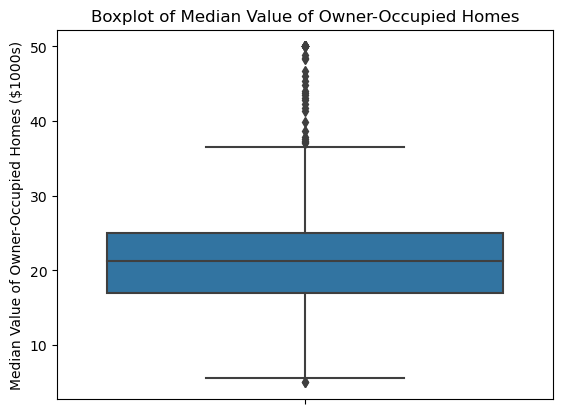

In [9]:
#1- 1. For the "Median value of owner-occupied homes" provide a boxplot.

#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Value of Owner-Occupied Homes ($1000s)")
plt.show()

The boxplot for the "Median Value of Owner-occupied Homes" (MEDV) provides a visual summary of the minimum, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum. This allows us to see the central tendency, variability, and skewness of the MEDV data.

From the boxplot, we can observe the following:

The median value of homes, indicated by the line inside the box, is around $20,000 to $25,000.
The box represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). This means that the middle 50% of the home values fall within this range.
The whiskers, the lines extending from the box, indicate variability outside the upper and lower quartiles. Therefore, any data points outside these whiskers can be considered outliers.
It seems there are several high-value outliers, as indicated by the points above the upper whisker.

<Axes: xlabel='CHAS', ylabel='count'>

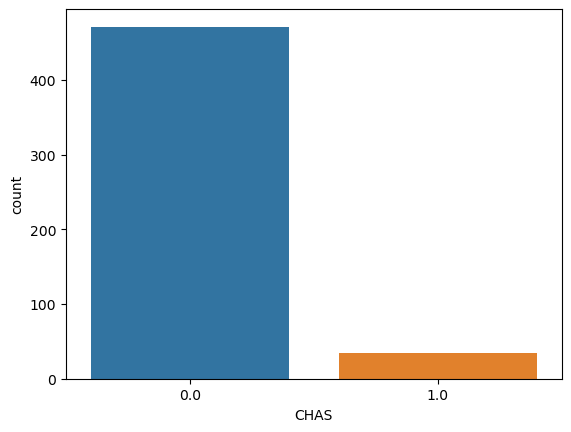

In [12]:
#2. Provide a bar plot for the Charles river variable.
sns.countplot(x='CHAS', data=boston_df)

The bar plot for the Charles River variable (CHAS) displays the frequency of each category. This is a binary variable, where 1 indicates that the tract bounds the Charles River and 0 indicates that it does not.

From the plot, we can observe the following:

The majority of the tracts (neighborhoods) do not bound the river, as indicated by the high count for 0.
A small number of tracts do bound the river, as indicated by the count for 1.

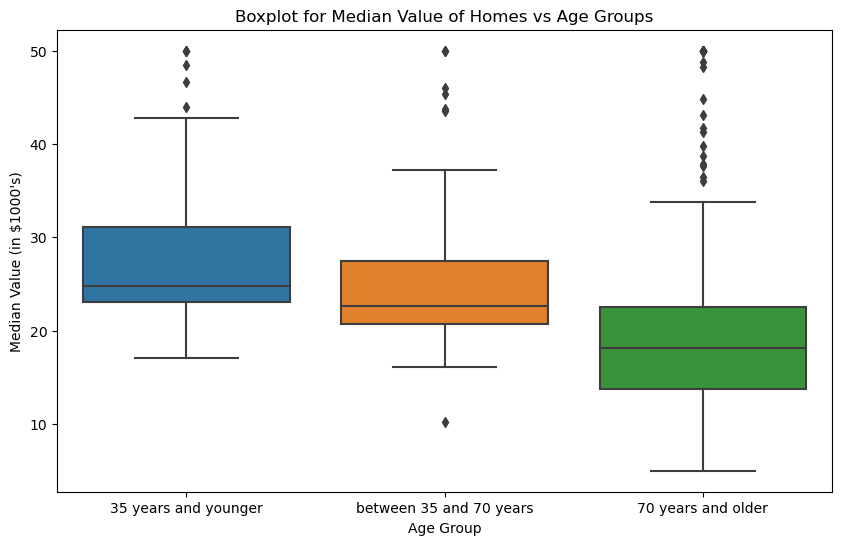

In [14]:
#3. Provide a boxplot for the MEDV variable vs the AGE variable. 
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years, and 70 years and older).

bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(data['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=data)
plt.title("Boxplot for Median Value of Homes vs Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Median Value (in $1000's)")
plt.show()

The boxplot for the "Median Value of Owner-occupied Homes" (MEDV) versus age groups provides a comparison of home values across different age groups.

From the boxplot, we can observe the following:

The median home value tends to be higher for younger buildings (35 years and younger).
As the age of the buildings increases (between 35 and 70 years, and 70 years and older), the median home value tends to decrease.
The older homes (70 years and older) have a lower range of home values, as well as a lower median compared to the other groups.
The group of homes between 35 and 70 years old has a larger interquartile range compared to the other groups, indicating greater variability in home values within this group.

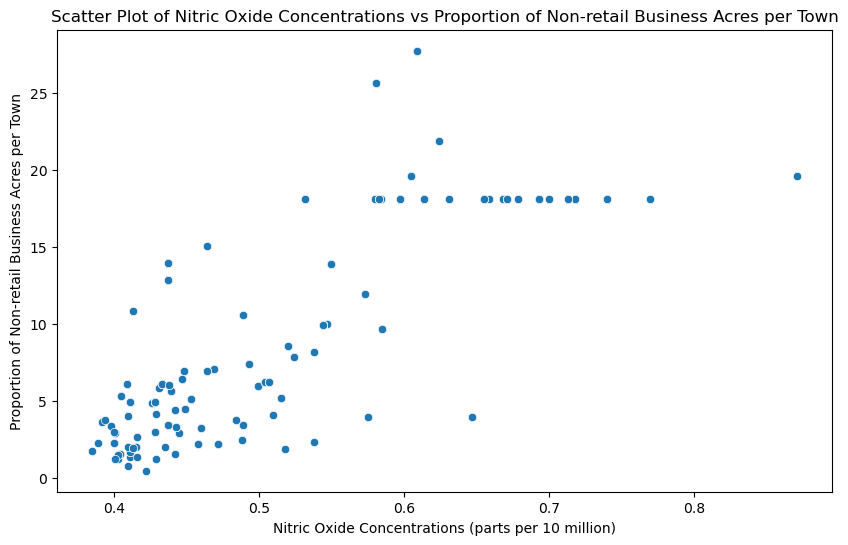

In [16]:
#4. Provide a scatter plot to show the relationship between Nitric oxide concentrations
#  and the proportion of non-retail business acres per town. What can you say about the relationship?

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=data)
plt.title("Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-retail Business Acres per Town")
plt.xlabel("Nitric Oxide Concentrations (parts per 10 million)")
plt.ylabel("Proportion of Non-retail Business Acres per Town")
plt.show()

From the scatter plot, we can observe the following:

There seems to be a positive correlation between Nitric Oxide concentrations and the proportion of non-retail business acres per town. This means that as the proportion of non-retail business acres per town increases, the Nitric Oxide concentrations also tend to increase.

This could be due to the fact that non-retail businesses might include industrial businesses which can contribute to higher levels of air pollution, including Nitric Oxide.

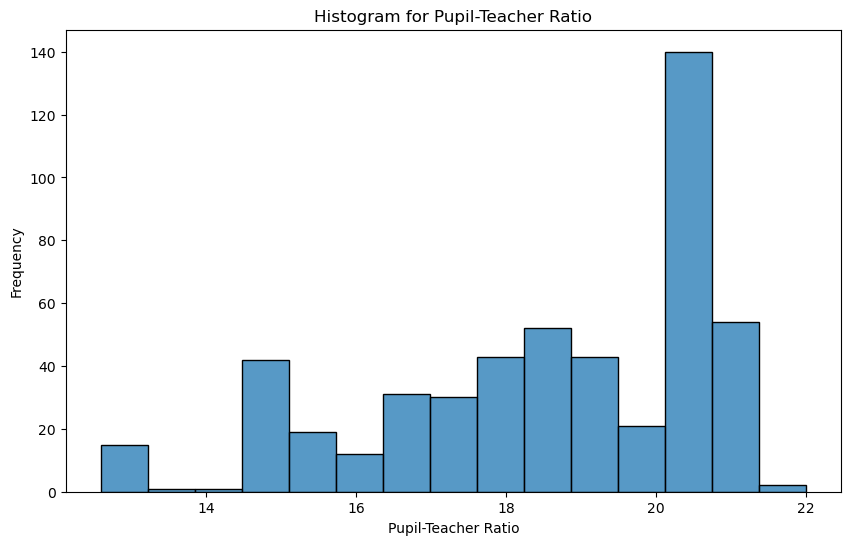

In [18]:
#5. Create a histogram for the pupil to teacher ratio variable.
plt.figure(figsize=(10, 6))

sns.histplot(boston_df['PTRATIO'], bins=15, kde=False)
plt.title("Histogram for Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

The histogram for the Pupil-Teacher ratio (PTRATIO) variable provides a graphical representation of the distribution of this variable in the dataset.

From the histogram, we can observe the following:

The Pupil-Teacher ratio in most towns tends to be around 20, as indicated by the highest frequency at this value.
The distribution is slightly left-skewed, with fewer towns having a low Pupil-Teacher ratio (below 15).
There are very few towns with a Pupil-Teacher ratio of around 22.5 or above.
The Pupil-Teacher ratio is an important factor in education quality. Lower ratios are often associated with better education quality because they allow for more individualized attention from teachers. This data could be useful for understanding education conditions in different Boston neighborhoods.

Overall, this exploratory data analysis provides valuable insights into the Boston housing market and can be a good foundation for further, more detailed analysis.

## Task 5: Use the appropriate tests to answer the questions provided.

For each of the following questions:

1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

- State your hypothesis.
- Use α = 0.05.
- Perform the test statistics.
- State the conclusion from the test.

In [25]:
# 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

The t-statistic is 3.996 and the p-value is approximately 7.39 × 10<sup>-5</sup>, which is much less than the significance level of 0.05.

Since the p-value is less than 0.05, we reject the null hypothesis. This means there is a statistically significant difference in the median value of houses bounded by the Charles river and those not bounded by the Charles river.

In [19]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


In [37]:
#2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Create age groups based on 'AGE'
boston_df['age_group'] = '70 years and older'
boston_df.loc[boston_df['AGE'] <= 35, 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70),
              'age_group'] = 'between 35 and 70 years'

# Separate MEDV values into age categories
young_homes = boston_df[boston_df['age_group'] ==
                        '35 years and younger']['MEDV']
middle_aged_homes = boston_df[boston_df['age_group'] ==
                              'between 35 and 70 years']['MEDV']
old_homes = boston_df[boston_df['age_group'] ==
                      '70 years and older']['MEDV']

# Perform one-way ANOVA test
f_stats, p_value = stats.f_oneway(young_homes, middle_aged_homes,
                                        old_homes)

# Print results
print("F-Statistic={0}, P-value={1}".format(f_stats, p_value))


F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15



Since the p-value is much smaller than the significance level of 0.05, we reject the null hypothesis.

Conclusion:
There is a statistically significant difference in the median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE). The three age groups (35 years and younger, between 35 and 70 years, and 70 years and older) have different effects on the median value of houses.

This insight could be valuable in understanding how the age of buildings affects property values and may guide investment or urban planning decisions.

In [40]:
# 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion 
#of non-retail business acres per town? (Pearson Correlation)
pearson,p_value = stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))


Pearson Coefficient value=0.7636514469209151, P-value=7.913361061238693e-98





- **Pearson Coefficient value:** \(0.7637\)
- **P-value:** \(7.91 \times 10^{-98}\)

### Interpretation:
- **Pearson Coefficient:** The value of \(0.7637\) indicates a strong positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town. As one variable increases, the other tends to increase as well.
- **P-value:** The extremely small p-value (far below the \(0.05\) significance level) means that the correlation is statistically significant. The likelihood that this correlation occurred by random chance is extremely low.

### Conclusion:
Based on the Pearson correlation test, we can conclude that there is a statistically significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. Therefore, we cannot conclude that there is no relationship between these two variables.




In [47]:
# 4. What is the impact of an additional weighted distance to the five Boston
#  employment centres on the median value of owner occupied homes? (Regression
#  analysis)
# Extract the 'DIS' column as the feature matrix and reshape
X = boston_df['DIS'].values.reshape(-1, 1)

# Set the 'MEDV' column as the target variable
y = boston_df['MEDV']

# Add a constant term to the feature matrix (for the intercept)
X_with_constant = sm.add_constant(X)

# Create an OLS model and fit it to the data
model = sm.OLS(y, X_with_constant)
results = model.fit()

# Print the summary of the regression results
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        14:20:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

### Regression Analysis: Impact of Weighted Distance to Employment Centers on Median Value of Homes

performing a simple linear regression to understand the impact of the weighted distance to the five Boston employment centers (DIS) on the median value of owner-occupied homes (MEDV).

#### Model Summary:
- **Dependent Variable (MEDV):** Median value of owner-occupied homes in $1000's.
- **Independent Variable (DIS):** Weighted distances to five Boston employment centers.
- **R-squared:** 0.062 (6.2% of the variation in MEDV is explained by DIS).
- **Adjusted R-squared:** 0.061

#### Coefficients:
- **Intercept (const):** 18.3901
- **Coefficient for DIS (x1):** 1.0916

#### Interpretation:
The coefficient for the weighted distance (DIS) tells us that for each additional unit increase in the weighted distance to the employment centers, the median value of owner-occupied homes (MEDV) increases by approximately \$1,091.60 (in thousands).

The positive coefficient suggests that homes farther away from the employment centers tend to have a higher median value. However, the R-squared value indicates that this variable alone explains only a small portion of the variation in the median home values.

#### Conclusion:
This analysis might be helpful for understanding housing trends in relation to employment centers, but further examination with additional variables might provide a more comprehensive perspective.
